# Analysis and comparison of the outcome of different models on the Bristol Airbnb listing for price prediction.

   In this analysis, a complete end to end machine learning project is implemented using the Bristol Airbnb Lisings dataset. The aim of the analysis is to provide a comarison of the results of different regression models that can be used to do predictions on the prices of the listings.

Many sources depict machine learning to be more of a trial and error approach rather than a one- shot single solution method. The following project analyses this hypothisis by applying the different models of machine learning on the sample case of Bristol Airbnb listing.
<br>
##### background:
Airbnb is a leading rental application platform facilitating rental subscription and collaboration mechanism between renter and prospective tennents. The application maybe contextualized for local listing. To reflect latest update to the listing, we employ the Airbnb listings for Bristol to analyze and predict the behavioural pattern to validate the above hypothisi
<br>
##### Approach:
The following approach is applied: <br>
1. Import the libraries and data
2. Data Pre-processing
3. Category encoding 
4. Application and comparison of different machine learing models.
5. Drawing inferences through scientific rationale and factual data.  

## <font color=darkblue>Importing the libraries </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sys
from pandas.tools.plotting import scatter_matrix
from matplotlib.pyplot import figure 
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import scale
from IPython.display import display
pd.set_option('display.precision',3)
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 5000
pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

## <font color=darkblue>Data Handling </font>

### Reading the data using pandas

In [3]:
ab=pd.read_csv('BristolAirbnbListings.csv') #Adding dataset
ab

id                                               name    host_id  \
0        70820                   City View - Sarah's double room.     360195   
1       117122                    City Centre - Waterside Retreat     591555   
2       146407                 Sunny Central Artist Cottage (Dbl)     708175   
3       176306  The White Room -  Central Bristol Art House Ga...     708175   
4       220956                Light, Modern, 1st Floor Apartment.    1145941   
5       307634  Peaceful Safe Home & Clear Space 'The Lilac Room'    1582810   
6       322906                   HUGE Room CENTRAL location House    1156132   
7       341227                  Magical Listed Georgian townhouse     237360   
8       389942                         Sunny retreat with ensuite    1950884   
9       389944                                 Spacious Cosy Room    1950884   
10      390781       Cosy large room near TV studios & Paintworks    1954565   
11      391612                    Central Cosy Double Room House1    1958566   
12      391613                Single Central Bristol Room House 1    1958566   
13      392215                home from home, large double, light    1961385   
14      392217                 home from home, lovely single room    1961385   
15      407485                    Bristol Luxury Garden Apartment    2029719   
16      421205                               The dog lovers haven    2094659   
17      422956                  Modern inner city 3 bed eco house    2103297   
18      554813  1 Double Room in Bristol Centre with own Bathroom    2727252   
19      559177                      Modern city centre loft style    2736590   
20      664979                Exclusive use of caravan, & parking    1949283   
21      676106                   Unique Dbl Loft space nr station     683638   
22      688324       The Green Room, Comfy Double in St Werburghs    3514043   
23      753655                 Edwardian house in central Bristol    3647954   
24      758894  Luxury Clifton Village, internet, parking permits    3996407   
25      774471                Lovely Single B/Rm-Central Location    4086056   
26      787688                  Entire quirky flat, amazing views     683638   
27      828102                 Charming Room in Victorian Terrace    4341765   
28      832235                     Luxury Double En Suite Bedroom    4356624   
29      838106                   Big double room ensuite bathroom    4379169   
30      853819                           peaceful short term home    4474160   
31      868888                   Large double room with breakfast    4577089   
32      870076                  Cosy Single Bedroom in Southville    3647954   
33      897555                 Cosy nicely lit room in Bedminster    3271882   
34      942226                BnB in Barn with 2 ensuite Bedrooms    2103297   
35      975170           Double room in quiet LGBTQ friendly home    5332833   
36      979236                    large ensuite with seating area    1156132   
37      995235                    Clifton Towers Bristol B and B     5466703   
38      996270                     Cosy Room in Victorian Terrace    4341765   
39     1033484                     Tranquil Room near City Centre    5687726   
40     1058698                Ace Attic room in Victorian Terrace    4341765   
41     1096853  Super Convenient, All You Need: Double Bed+Single     487598   
42     1096947  Super Convenient, All You Need -  Cosy Double ...     487598   
43     1166104  Private room in ‘Garden Square' Georgian townh...    6386989   
44     1194755        Colourful Victorian House with Siamese cats    1950884   
45     1258955                    Small double room in Bedminster    3271882   
46     1260621                     An Old Jewellers in Montpelier    6865698   
47     1306288    A quiet, private, modern apartment with balcony    7102048   
48     1329265   Excellent central location, perfect for visitors    7144675   
49     13376

### Getting an idea of the values and structure of the data
The 'shape' function is used to get the size of the dataset in (rows, columns) format. The 'info' function gives more information about each column in the dataframe. Finally the 'describe' funtion gives more details of all the values in the dataframe. 

In [4]:
ab.shape #checking initial shape before dropping

(2375, 28)

In [5]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 28 columns):
id                                2375 non-null int64
name                              2375 non-null object
host_id                           2375 non-null int64
host_name                         2375 non-null object
neighbourhood                     2375 non-null object
postcode                          2326 non-null object
latitude                          2375 non-null float64
longitude                         2375 non-null float64
property_type                     2375 non-null object
room_type                         2375 non-null object
accommodates                      2375 non-null object
bathrooms                         2372 non-null object
bedrooms                          2372 non-null object
beds                              2372 non-null object
price                             2375 non-null int64
minimum_nights                    2375 non-null int64
number_of_revie

In [6]:
ab.describe()

id              host_id             latitude  \
count             2,375.00             2,375.00             2,375.00   
mean         19,162,079.42        70,692,850.68                51.46   
std           7,605,463.81        64,144,258.32                 0.02   
min              70,820.00            52,536.00                51.40   
25%          14,000,280.50        19,293,949.00                51.45   
50%          20,437,190.00        47,632,939.00                51.46   
75%          25,636,215.50       115,645,470.50                51.47   
max          30,099,927.00       226,145,538.00                51.51   

                 longitude                price       minimum_nights  \
count             2,375.00             2,375.00             2,375.00   
mean                 -2.59                76.60                 2.83   
std                   0.03               129.17                13.12   
min                  -2.70                 0.00                 1.00   
25%                  -2.61                35.00                 1.00   
50%                  -2.59                59.00                 2.00   
75%                  -2.58                85.00                 2.00   
max                  -2.51             5,000.00               365.00   

         number_of_reviews    reviews_per_month  review_scores_communication  \
count             2,375.00             2,069.00                     2,037.00   
mean                 31.61                 2.19                         9.83   
std                  51.22                 2.20                         0.58   
min                   0.00                 0.02                         0.00   
25%                   2.00                 0.57                        10.00   
50%                  11.00                 1.45                        10.00   
75%                  38.00                 3.10                        10.00   
max                 477.00                18.03                        10.00   

       review_scores_location  review_scores_value  \
count                2,035.00             2,035.00   
mean                     9.56                 9.47   
std                      0.67                 0.80   
min                      0.00                 0.00   
25%                      9.00                 9.00   
50%                     10.00                10.00   
75%                     10.00                10.00   
max                     10.00                10.00   

       calculated_host_listings_count     availability_365  
count                        2,375.00             2,375.00  
mean                             6.94               121.52  
std                             16.77               128.37  
min                              1.00                 0.00  
25%                              1.00                 0.00  
50%                              1.00                71.00  
75%                              3.00               225.50  
max                             78.00               365.00

## <font color=darkblue> Cleaning the Data</font>

Once the dataframe detailes are understood, the next step in the analysis is to clean the data to make sure that there are no  discrepancies.

### Dropping the unnecessary columns from the dataframe
   Dropping the columns that are not going to be used as parameters in the analysis.

In [7]:
#Dropping the rows which are not required
ab2= ab.drop(['id','name','host_id', 'host_name', 'postcode','latitude','longitude','property_type', 'neighbourhood', 'minimum_nights',
              'last_review', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
              'review_scores_communication', 'review_scores_location', 'review_scores_value', 'availability_365'],axis=1)

In [8]:
ab2

room_type     accommodates        bathrooms bedrooms     beds  \
0        Private room                2                1        1        1   
1        Private room                4                2        1        2   
2        Private room                3                1        1        2   
3        Private room                2                1        1        1   
4     Entire home/apt                2                1        1        1   
5        Private room                2                1        1        1   
6        Private room                3                1        1        2   
7     Entire home/apt               14                3        5       10   
8        Private room                2                1        1        1   
9        Private room                1              NaN        1        1   
10       Private room                1                1        1        1   
11       Private room                1                1        1        1   
12       Private room                1                1        1        1   
13       Private room                1                1        1        1   
14       Private room                1                1        1        1   
15    Entire home/apt                5                1        1        3   
16       Private room                2                1        1        1   
17    Entire home/apt                5                2        3        4   
18       Private room                2                1        1        1   
19    Entire home/apt                2                1        1        1   
20    Entire home/apt                2                1        1        3   
21       Private room                2                1        1        1   
22       Private room                2                1        1        1   
23       Private room                2                1        1        1   
24    Entire home/apt                4                1        1        1   
25       Private room                2                1        1        2   
26    Entire home/apt                4                1        2        3   
27       Private room                2              1.5        1        1   
28       Private room                2                1        1        1   
29       Private room                2                1        1        1   
30       Private room                2              NaN        1      NaN   
31       Private room                2                1        1        1   
32       Private room                1              NaN        1        1   
33       Private room                1                1        1        1   
34    Entire home/apt                5                2        2        4   
35       Private room                2              2.5        1        1   
36       Private room                2                1        1        1   
37       Private room                2                1        1        1   
38       Private room     Private room                2      1.5        1   
39       Private room                1              1.5        1        1   
40       Private room                2              1.5        1        1   
41       Private room                3              1.5        1        2   
42       Private room                2              1.5        1        1   
43       Private room                2                1        1        2   
44    Entire home/apt                8              2.5        4        5   
45       Private room                2                1        1        1   
46       Private room                2                1        1        1   
47    Entire home/apt                2                1        1        1   
48       Private room                3                1        1        1   
49    Entire home/apt                9                4        5        6   
50    Entire home/apt                5                1        1        3   
51      

Getting the new size of the dataframe

In [9]:
#Shape of new shortned df
ab2.shape

(2375, 10)

### Dropping all the null values
   The next step in data cleaning is the process of removing all the null values in the dataset. Usually, to handle null values, either the row with the null value is completely removed or the precending value is imputed. In this analysis, it was decided it was best to remove the complete row containing the null values. It is implemented in the folllowing steps:

#### Step-1:
Getting a total sum of all the null values in each column

In [10]:
ab_null=ab2.isnull().sum() #checking the rows with max NAN values
ab_null

room_type                           0
accommodates                        0
bathrooms                           3
bedrooms                            3
beds                                3
price                               0
number_of_reviews                   0
reviews_per_month                 306
review_scores_rating              336
calculated_host_listings_count      0
dtype: int64

#### Step-2
Checking the total number of null values row-wise.

In [11]:
ab_null_=ab2.isnull().T.sum() #checking the rows with max NAN values
ab_null_=ab_null_.reset_index(name='val')
ab_null_

index  val
0         0    0
1         1    0
2         2    0
3         3    0
4         4    0
5         5    0
6         6    0
7         7    0
8         8    0
9         9    1
10       10    0
11       11    0
12       12    0
13       13    0
14       14    0
15       15    0
16       16    0
17       17    0
18       18    0
19       19    0
20       20    0
21       21    0
22       22    0
23       23    0
24       24    0
25       25    0
26       26    0
27       27    0
28       28    0
29       29    0
30       30    4
31       31    0
32       32    1
33       33    0
34       34    0
35       35    0
36       36    0
37       37    0
38       38    0
39       39    0
40       40    0
41       41    0
42       42    0
43       43    0
44       44    0
45       45    0
46       46    0
47       47    0
48       48    0
49       49    0
50       50    0
51       51    0
52       52    0
53       53    0
54       54    0
55       55    0
56       56    0
57       57    0
58       58    2
59       59    0
60       60    1
61       61    0
62       62    0
63       63    0
64       64    0
65       65    0
66       66    0
67       67    0
68       68    0
69       69    0
70       70    0
71       71    0
72       72    0
73       73    1
74       74    0
75       75    0
76       76    0
77       77    0
78       78    0
79       79    0
80       80    0
81       81    0
82       82    0
83       83    0
84       84    0
85       85    0
86       86    1
87       87    0
88       88    0
89       89    0
90       90    0
91       91    0
92       92    0
93       93    0
94       94    0
95       95    0
96       96    0
97       97    0
98       98    0
99       99    0
100     100    0
101     101    0
102     102    0
103     103    0
104     104    0
105     105    0
106     106    0
107     107    0
108     108    0
109     109    0
110     110    0
111     111    0
112     112    0
113     113    0
114     114    1
115     115    0
116     116    0
117     117    0
118     118    0
119     119    0
120     120    0
121     121    0
122     122    0
123     123    0
124     124    0
125     125    0
126     126    1
127     127    0
128     128    0
129     129    2
130     130    0
131     131    0
132     132    0
133     133    0
134     134    0
135     135    0
136     136    0
137     137    0
138     138    0
139     139    0
140     140    0
141     141    0
142     142    0
143     143    0
144     144    0
145     145    0
146     146    0
147     147    0
148     148    0
149     149    0
150     150    0
151     151    0
152     152    0
153     153    0
154     154    0
155     155    0
156     156    0
157     157    0
158     158    0
159     159    0
160     160    0
161     161    0
162     162    0
163     163    0
164     164    0
165     165    0
166     166    2
167     167    0
168     168    0
169     169    0
170     170    0
171     171    0
172     172    0
173     173    0
174     174    0
175     175    0
176     176    0
177     177    0
178     178    0
179     179    0
180     180    0
181     181    0
182     182    0
183     183    0
184     184    0
185     185    0
186     186    0
187     187    0
188     188    0
189     189    0
190     190    0
191     191    0
192     192    0
193     193    0
194     194    0
195     195    0
196     196    0
197     197    0
198     198    0
199     199    1
200     200    0
201     201    0
202     202    0
203     203    0
204     204    0
205     205    0
206     206    0
207     207    0
208     208    2
209     209    0
210     210    0
211     211    0
212     212    2
213     213    0
214     214    0
215     215    0
216     216    0
217     217    0
218     218    0
219     219    0
220     220    0
221     221    2
222     222    0
223     223    0
224     224    0
225     225    0
226     226    0
227     227    0
228     228    0
229     229    0
230     230    0
231     231    0
232     232    0
233     233    0
234     234

#### Step-3
Dropping all the null values in the dataframe and placing it into a new dataframe called 'ab3'

In [12]:
#Dropping all the null values
ab3=ab2.dropna(axis=0)

#### Step-4
Checking the updated size of the dataframe.

In [13]:
#getting the shape of the new df to check the no. of dropped rows
ab3.shape

(2032, 10)

### Checking the Data-types
Usually, data is not always in the datatype that is desired for analysis. It is the task of the programmer to make sure any data-type is converted to the required format.

#### Step-1
Checking the datatype format for individal columns.

In [14]:
ab3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2349
Data columns (total 10 columns):
room_type                         2032 non-null object
accommodates                      2032 non-null object
bathrooms                         2032 non-null object
bedrooms                          2032 non-null object
beds                              2032 non-null object
price                             2032 non-null int64
number_of_reviews                 2032 non-null int64
reviews_per_month                 2032 non-null float64
review_scores_rating              2032 non-null object
calculated_host_listings_count    2032 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 174.6+ KB


#### Step-2
In order to convert the datatype of the columns, it is required ensure all the values meet the conditions of the datatype intended to be converted to. 

For columns which were selected for the convertion, it is required to ensure that all the unique values met the requirements as intended. If any undesired data is present, their corresponding row are dropped.

In [15]:
ab3.beds.unique()


array(['1', '2', '10', '3', '4', '5', '6', '7', '8', '14', '13', '11',
       '16', '24', 'Bristol', '0'], dtype=object)

In [16]:
abb=ab3.loc[ab3['beds'] == "Bristol"].index.values
ab3.drop(abb, inplace= True)
ab3.reset_index(inplace=True, drop=True)



In [17]:
ab3.bathrooms.unique()



array(['1', '2', '3', '1.5', '2.5', '4', '0.5', '5', '0', '4.5', '3.5',
       '8', '7', 'Private room', '12.5', 'Entire home/apt'], dtype=object)

In [18]:
abb=ab3.loc[ab3['bathrooms'] == "Private room"].index.values
abb1=ab3.loc[ab3['bathrooms'] == "Entire home/apt"].index.values
ab3.drop(abb, inplace=True)
ab3.reset_index(inplace=True, drop=True)
ab3.drop(abb1, inplace=True)
ab3.reset_index(inplace=True, drop=True)


In [19]:
ab3.accommodates.unique()

array(['2', '4', '3', '14', '1', '5', 'Private room', '8', '9', '6', '10',
       '7', '12', 'Entire home/apt', '16', '11', '15', 'Guesthouse', '13'],
      dtype=object)

In [20]:
abb=ab3.loc[ab3['accommodates'] == "Private room"].index.values
ab3.drop(abb, inplace=True)
ab3.reset_index(inplace=True, drop=True)

In [21]:
abb1=ab3.loc[ab3['accommodates'] == "Entire home/apt"].index.values
ab3.drop(abb1, inplace=True)
ab3.reset_index(inplace=True, drop=True)


In [22]:
abb2=ab3.loc[ab3['accommodates'] == "Guesthouse"].index.values
ab3.drop(abb2, inplace=True)
ab3.reset_index(inplace=True, drop=True)
ab3

room_type accommodates bathrooms bedrooms beds  price  \
0        Private room            2         1        1    1     27   
1        Private room            4         2        1    2     65   
2        Private room            3         1        1    2     38   
3        Private room            2         1        1    1     35   
4     Entire home/apt            2         1        1    1     59   
5        Private room            2         1        1    1     35   
6        Private room            3         1        1    2     65   
7     Entire home/apt           14         3        5   10    450   
8        Private room            2         1        1    1     50   
9        Private room            1         1        1    1     27   
10       Private room            1         1        1    1     32   
11       Private room            1         1        1    1     25   
12       Private room            1         1        1    1     17   
13       Private room            1         1        1    1     16   
14    Entire home/apt            5         1        1    3     98   
15       Private room            2         1        1    1     28   
16    Entire home/apt            5         2        3    4    150   
17       Private room            2         1        1    1     45   
18    Entire home/apt            2         1        1    1     90   
19    Entire home/apt            2         1        1    3     24   
20       Private room            2         1        1    1     30   
21       Private room            2         1        1    1     28   
22       Private room            2         1        1    1     50   
23    Entire home/apt            4         1        1    1     95   
24       Private room            2         1        1    2     35   
25    Entire home/apt            4         1        2    3     68   
26       Private room            2       1.5        1    1     26   
27       Private room            2         1        1    1     55   
28       Private room            2         1        1    1     55   
29       Private room            2         1        1    1     21   
30       Private room            1         1        1    1     27   
31    Entire home/apt            5         2        2    4    120   
32       Private room            2       2.5        1    1     28   
33       Private room            2         1        1    1     55   
34       Private room            2         1        1    1     48   
35       Private room            1       1.5        1    1     33   
36       Private room            2       1.5        1    1     28   
37       Private room            3       1.5        1    2     32   
38       Private room            2       1.5        1    1     29   
39       Private room            2         1        1    2     37   
40    Entire home/apt            8       2.5        4    5    150   
41       Private room            2         1        1    1     33   
42       Private room            2         1        1    1     28   
43    Entire home/apt            2         1        1    1    105   
44       Private room            3         1        1    1     35   
45    Entire home/apt            9         4        5    6    350   
46    Entire home/apt            5         1        1    3     76   
47       Private room            1         1        1    1     17   
48       Private room            2         1        1    1     55   
49       Private room            2         1        1    1     40   
50       Private room            2         2        1    1     44   
51       Private room            1         1        1    1     27   
52       Private room            2         1        1    1     27   
53    Entire home/apt            2         1        1    1     85   
54       Private room            1         1        1    1     22   
55       Private room            2       1.5        1    1     35   
56       Private room            3       1.5        1    2     35   
57    Enti

In [23]:
ab3.accommodates.unique()

array(['2', '4', '3', '14', '1', '5', '8', '9', '6', '10', '7', '12',
       '16', '11', '15', '13'], dtype=object)

#### Step-3
Coverting the desired columns from the object datatype to int or float datatype depending on the data present.

In [24]:
#convert some objects to int from above
ab3['beds'] = ab3['beds'].astype("int")
ab3['bedrooms'] = ab3['bedrooms'].astype("float")
ab3['bathrooms'] = ab3['bathrooms'].astype("float")
ab3['accommodates'] = ab3['accommodates'].astype("int")
ab3['review_scores_rating'] = ab3['review_scores_rating'].astype("int")






### Understanding the price distribution between the different room_type categories.

Text(0.5,1,'price vs bedrooms')

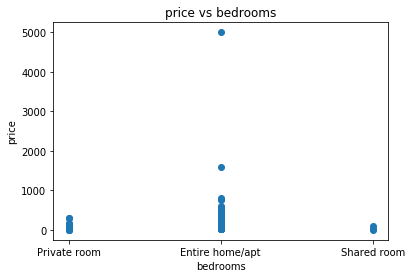

In [26]:
plt.scatter(ab3['room_type'],ab3['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('price vs bedrooms')

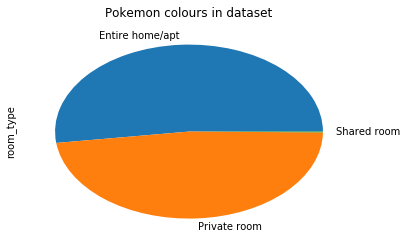

In [27]:
ab3['room_type'].value_counts().plot.pie()
plt.title('Pokemon colours in dataset')
plt.show()

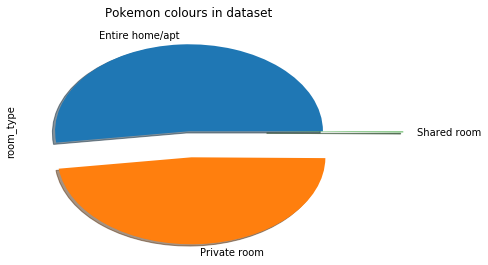

In [28]:
ab3['room_type'].value_counts().plot.pie(explode=(0,0.3, 0.6), shadow=True)
plt.title('Pokemon colours in dataset')
plt.show()

## <font color=darkblue>Encoding the categorical data </font>
Encoding is a technique that is usually employed to convert catagorical data into encoded numerical values.
In order to convert the catagorical data, many methods can be used such as 'one hot encoding'. This is generally done to facilitate Machine leaning models as they cannot input character type data. One particular method used in this analysis is the *get_dummmies* function, which encodes the catagorical data into a binary format of 0's and 1's. It is implemented in the following steps: 

#### Step-1
Applying the *get_dummies* funtion to the category column, it can be seen how the diffent room types get encoded corresponding to each of the listings.

In [29]:
indicator = pd.get_dummies(ab3['room_type'])
indicator

Entire home/apt  Private room  Shared room
0                   0             1            0
1                   0             1            0
2                   0             1            0
3                   0             1            0
4                   1             0            0
5                   0             1            0
6                   0             1            0
7                   1             0            0
8                   0             1            0
9                   0             1            0
10                  0             1            0
11                  0             1            0
12                  0             1            0
13                  0             1            0
14                  1             0            0
15                  0             1            0
16                  1             0            0
17                  0             1            0
18                  1             0            0
19                  1             0            0
20                  0             1            0
21                  0             1            0
22                  0             1            0
23                  1             0            0
24                  0             1            0
25                  1             0            0
26                  0             1            0
27                  0             1            0
28                  0             1            0
29                  0             1            0
30                  0             1            0
31                  1             0            0
32                  0             1            0
33                  0             1            0
34                  0             1            0
35                  0             1            0
36                  0             1            0
37                  0             1            0
38                  0             1            0
39                  0             1            0
40                  1             0            0
41                  0             1            0
42                  0             1            0
43                  1             0            0
44                  0             1            0
45                  1             0            0
46                  1             0            0
47                  0             1            0
48                  0             1            0
49                  0             1            0
50                  0             1            0
51                  0             1            0
52                  0             1            0
53                  1             0            0
54                  0             1            0
55                  0             1            0
56                  0             1            0
57                  1             0            0
58                  0             1            0
59                  0             1            0
60                  0             1            0
61                  0             1            0
62                  0             1            0
63                  0             1            0
64                  0             1            0
65                  1             0            0
66                  1             0            0
67                  0             1            0
68                  0             1            0
69                  0             1            0
70                  1             0            0
71                  0             1            0
72                  0             1            0
73                  1             0            0
74                  0             1            0
75                  0             1            0
76                  1             0            0
77                  1             0            0
78                  1             0            0
79                  0             1            0
80                  1             0  

#### Step-2
Drop the orginal 'room_type' column from the ab3 dataframe as the encoded values will be added.

In [30]:
# drop the obj_cols columns from ab3 and add the indicator version
ab3.drop(['room_type'],axis=1, inplace=True)


#### Step-3
Finally merge the encoded indicator dataframe with ab3 dataframe.

In [31]:
ab3 = pd.merge(ab3,indicator, left_index=True, right_index=True)
ab3.head()

accommodates            bathrooms             bedrooms  beds  price  \
0             2                 1.00                 1.00     1     27   
1             4                 2.00                 1.00     2     65   
2             3                 1.00                 1.00     2     38   
3             2                 1.00                 1.00     1     35   
4             2                 1.00                 1.00     1     59   

   number_of_reviews    reviews_per_month  review_scores_rating  \
0                130                 2.10                    96   
1                126                 1.40                    99   
2                 57                 0.76                    91   
3                 30                 0.41                    95   
4                 74                 0.85                    94   

   calculated_host_listings_count  Entire home/apt  Private room  Shared room  
0                               5                0             1            0  
1                               1                0             1            0  
2                               2                0             1            0  
3                               2                0             1            0  
4                               1                1             0            0

In [32]:
ab3.head()

accommodates            bathrooms             bedrooms  beds  price  \
0             2                 1.00                 1.00     1     27   
1             4                 2.00                 1.00     2     65   
2             3                 1.00                 1.00     2     38   
3             2                 1.00                 1.00     1     35   
4             2                 1.00                 1.00     1     59   

   number_of_reviews    reviews_per_month  review_scores_rating  \
0                130                 2.10                    96   
1                126                 1.40                    99   
2                 57                 0.76                    91   
3                 30                 0.41                    95   
4                 74                 0.85                    94   

   calculated_host_listings_count  Entire home/apt  Private room  Shared room  
0                               5                0             1            0  
1                               1                0             1            0  
2                               2                0             1            0  
3                               2                0             1            0  
4                               1                1             0            0

## <font color=darkblue>Correlation and Visualization </font>
Generally, during the analysis of any dataset, checking the correlation between columns and visualization of the data allows for a better insight
into how the data trends are structured and to what extent the values are related to each other.

### Applying Correlation
When the *corr* function is applied to the ab3 dataframe, it provides a correlation score in the range of `+1` to `-1`. A strong positive correlation is indicated by `+1` whereas `0` indicates 'No correlation' and `-1` depictes a 'Strong Negative Correlation'. The higher the correlation score, the better the predicton accuracy.

In [33]:
corr_matrix = ab3.corr()
corr_matrix

accommodates            bathrooms  \
accommodates                                   1.00                 0.53   
bathrooms                                      0.53                 1.00   
bedrooms                                       0.82                 0.60   
beds                                           0.89                 0.57   
price                                          0.46                 0.31   
number_of_reviews                             -0.06                -0.05   
reviews_per_month                             -0.01                -0.08   
review_scores_rating                           0.00                 0.03   
calculated_host_listings_count                -0.04                -0.06   
Entire home/apt                                0.52                 0.13   
Private room                                  -0.52                -0.12   
Shared room                                   -0.03                -0.04   

                                           bedrooms                 beds  \
accommodates                                   0.82                 0.89   
bathrooms                                      0.60                 0.57   
bedrooms                                       1.00                 0.81   
beds                                           0.81                 1.00   
price                                          0.42                 0.50   
number_of_reviews                             -0.11                -0.07   
reviews_per_month                             -0.10                -0.04   
review_scores_rating                           0.06                -0.00   
calculated_host_listings_count                -0.11                -0.05   
Entire home/apt                                0.37                 0.40   
Private room                                  -0.37                -0.40   
Shared room                                   -0.02                -0.01   

                                              price    number_of_reviews  \
accommodates                                   0.46                -0.06   
bathrooms                                      0.31                -0.05   
bedrooms                                       0.42                -0.11   
beds                                           0.50                -0.07   
price                                          1.00                -0.06   
number_of_reviews                             -0.06                 1.00   
reviews_per_month                             -0.05                 0.60   
review_scores_rating                           0.01                 0.06   
calculated_host_listings_count                 0.01                -0.11   
Entire home/apt                                0.26                -0.07   
Private room                                  -0.26                 0.08   
Shared room                                   -0.01                -0.02   

                                  reviews_per_month  review_scores_rating  \
accommodates                                  -0.01                  0.00   
bathrooms                                     -0.08                  0.03   
bedrooms                                      -0.10                  0.06   
beds                                          -0.04                 -0.00   
price                                         -0.05                  0.01   
number_of_reviews                              0.60                  0.06   
reviews_per_month                              1.00                  0.09   
review_scores_rating                           0.09                  1.00   
calculated_host_listings_count                -0.09                 -0.15   
Entire home/apt                                0.02                 -0.07   
Private room                                  -0.01                  0.07   
Shared room                                   -0.03                 -0.08   

                                calculated_host_listings_count  \
acco

In [34]:
corr_matrix["price"].sort_values(ascending=False)

price                                            1.00
beds                                             0.50
accommodates                                     0.46
bedrooms                                         0.42
bathrooms                                        0.31
Entire home/apt                                  0.26
review_scores_rating                             0.01
calculated_host_listings_count                   0.01
Shared room                                     -0.01
reviews_per_month                               -0.05
number_of_reviews                               -0.06
Private room                                    -0.26
Name: price, dtype: float64

##### Heat map to show correlation 
In the correlation, the darker colors reperesent lower correlation and the lighter color repersent a stronger correlation.

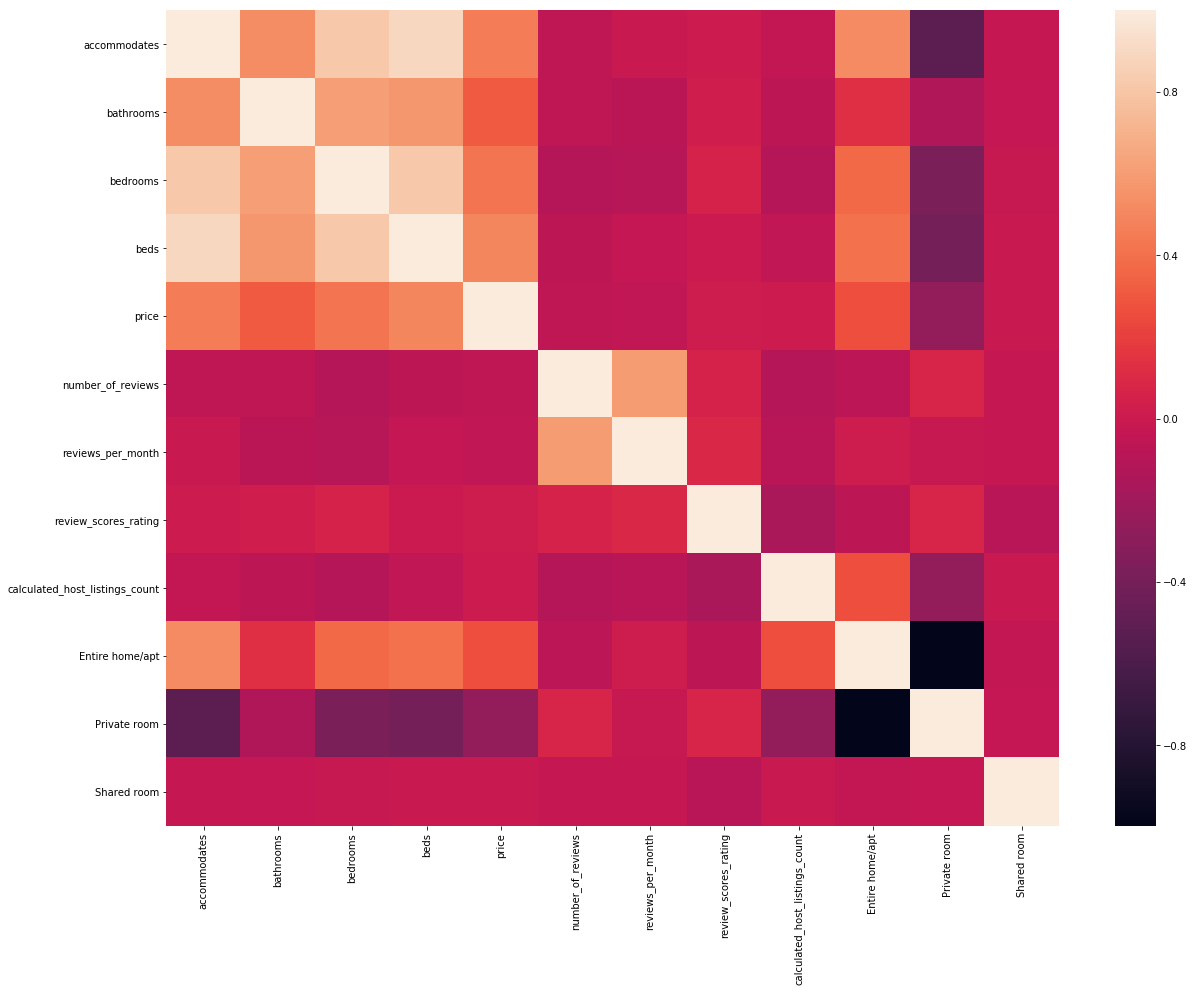

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix)

   As the goal of this analysis is to compare the results of different models based on the prediction of Prices, naturally the **price** column has to be chosen. When taking a more indepth look at the correlation of the columns, it can be observed that the **price** column had a low correlation with values of other columns which might be mostly due to either outliers or other discrepencies present in the data. When trying to find a high correalation column, it can be noticed that the **Bedrooms** column had the highest correlation with the other columns, when compared to that of the **price** column

### Visualization
Visualzing the data is geneally one the best approaches to understand the trends in the data. It helps to provide a big picture of the range of the values in the dataset, and may even help find outliers or redundent data.
<br>
In this analysis it is felt better to keep the outliers as such since some of the listings in the dataset might be unique places put up on Airbnb by the owners. *For example*: A luxray class renter may choose a property to pay price than the normal and we may not ignore such occurances as outliers.

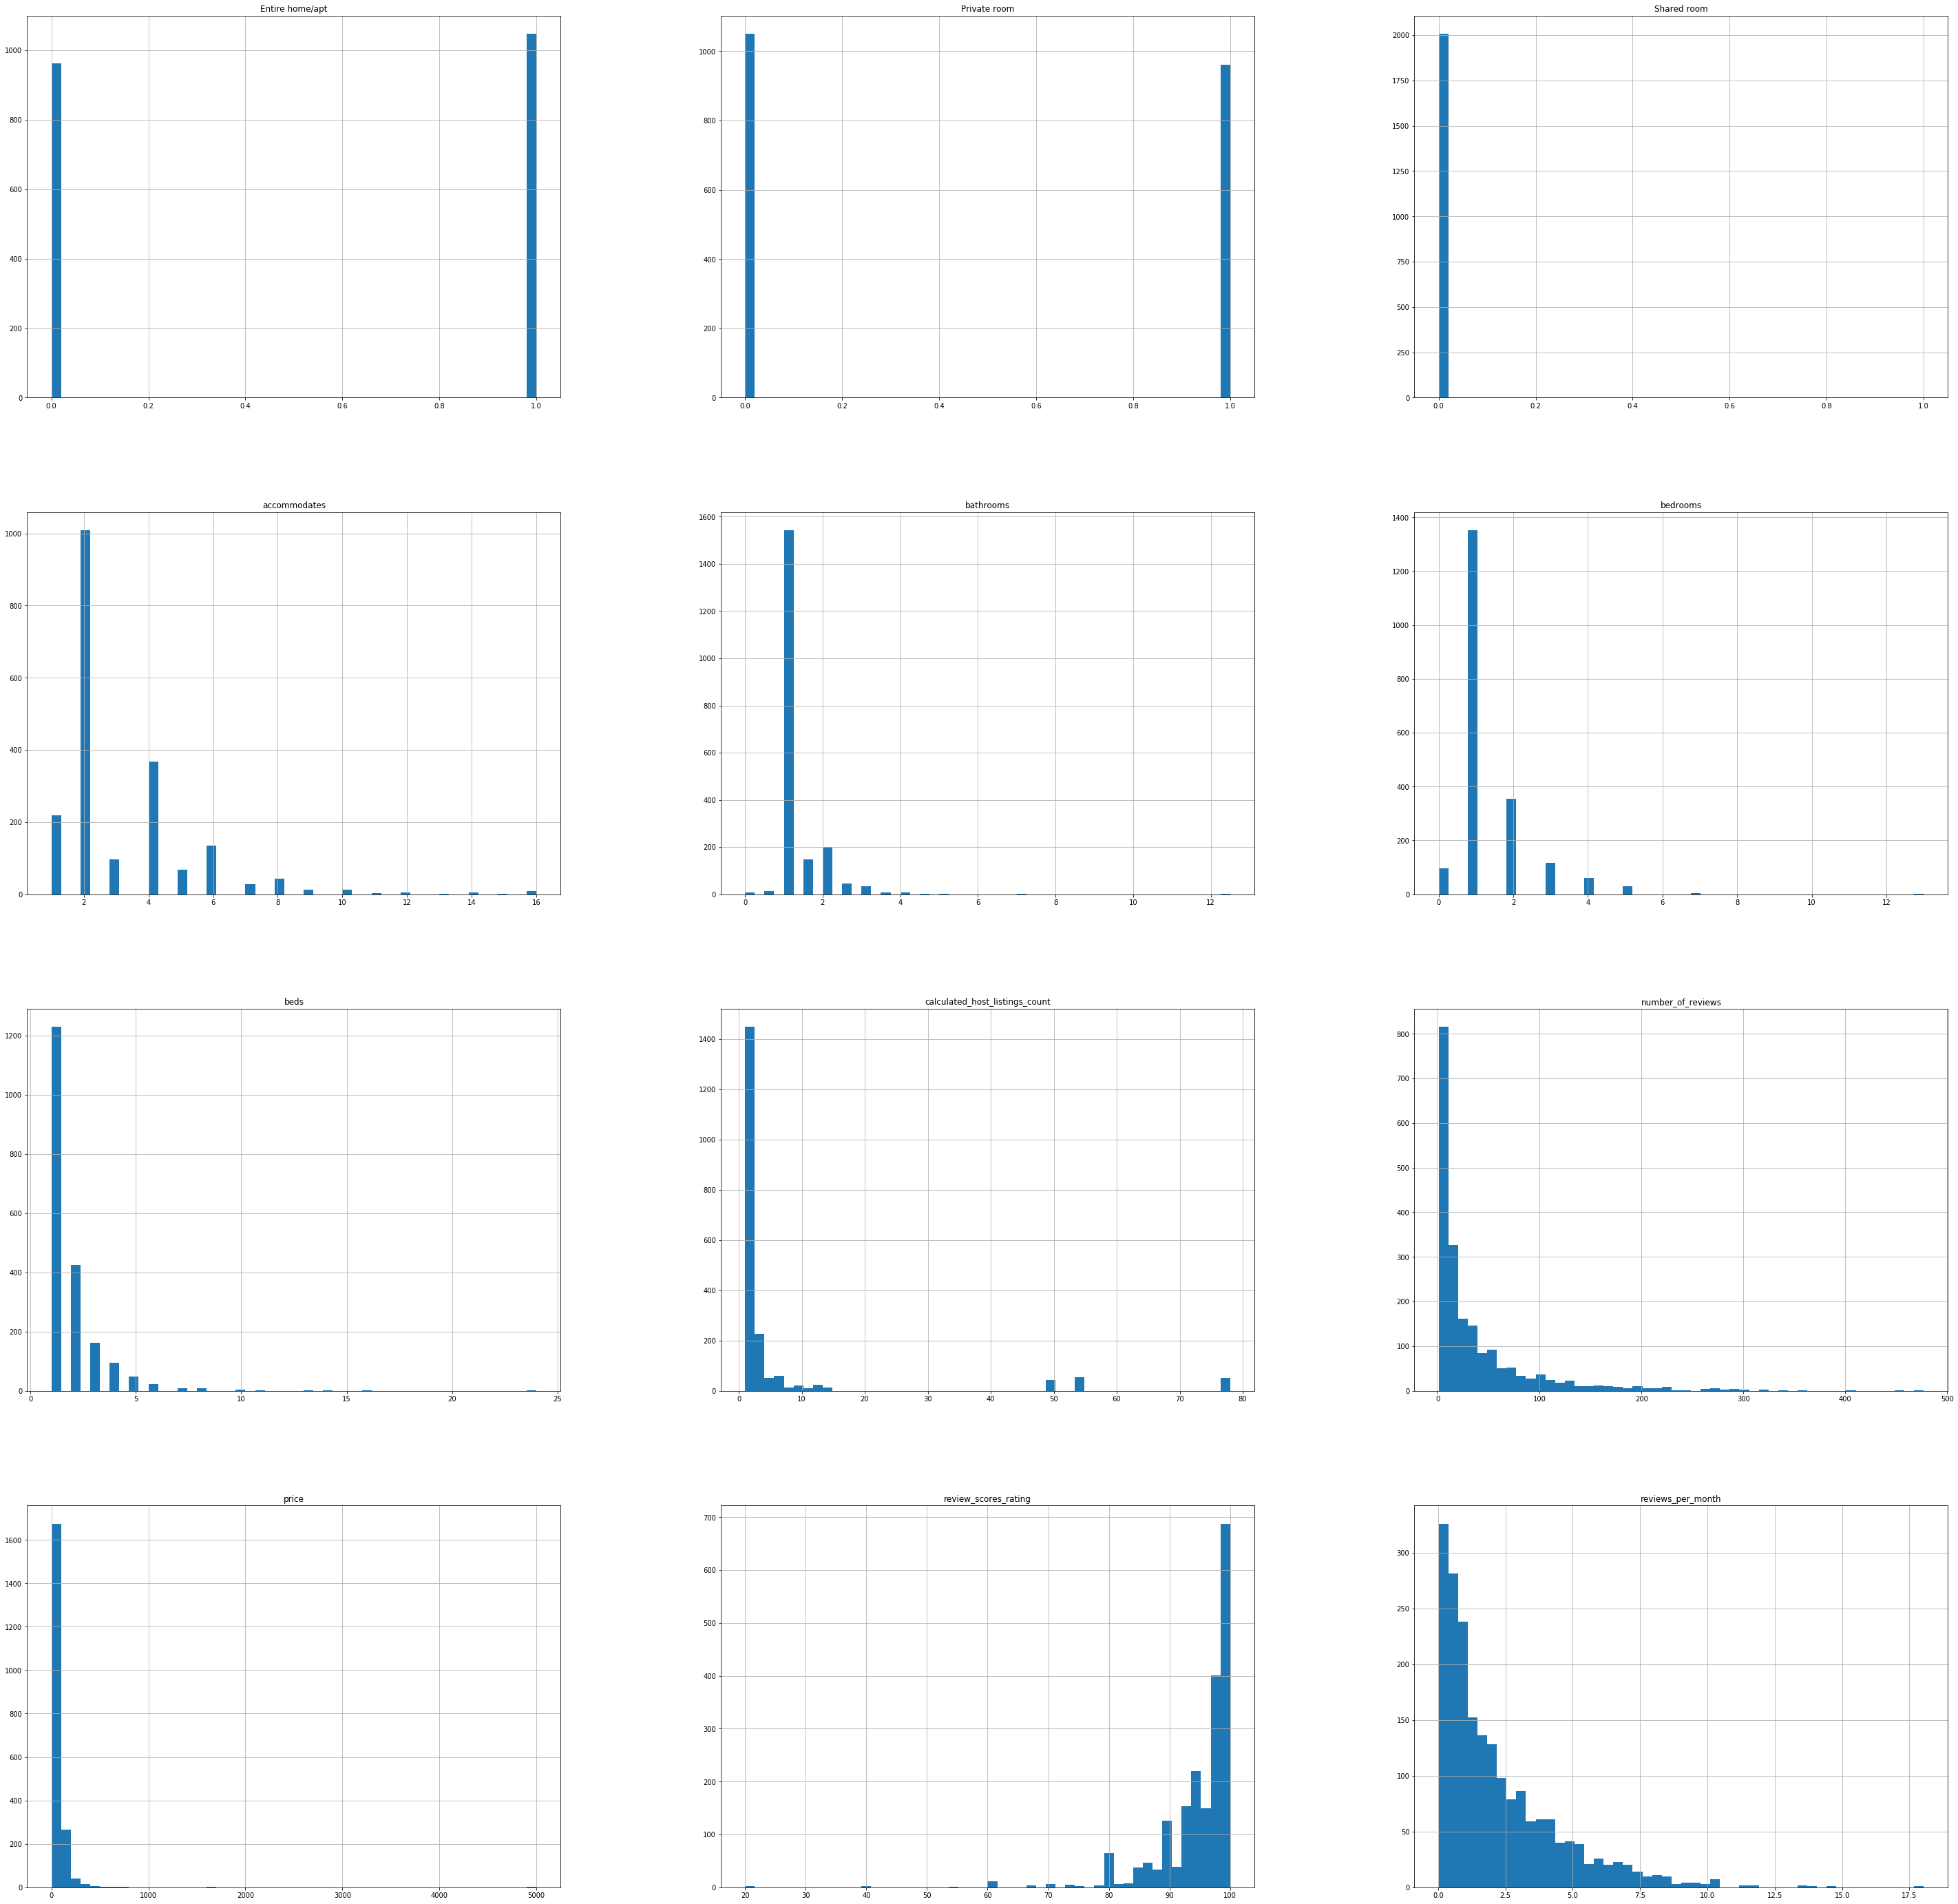

In [36]:
ab3.hist(bins=50, figsize=(50,50))
plt.show()

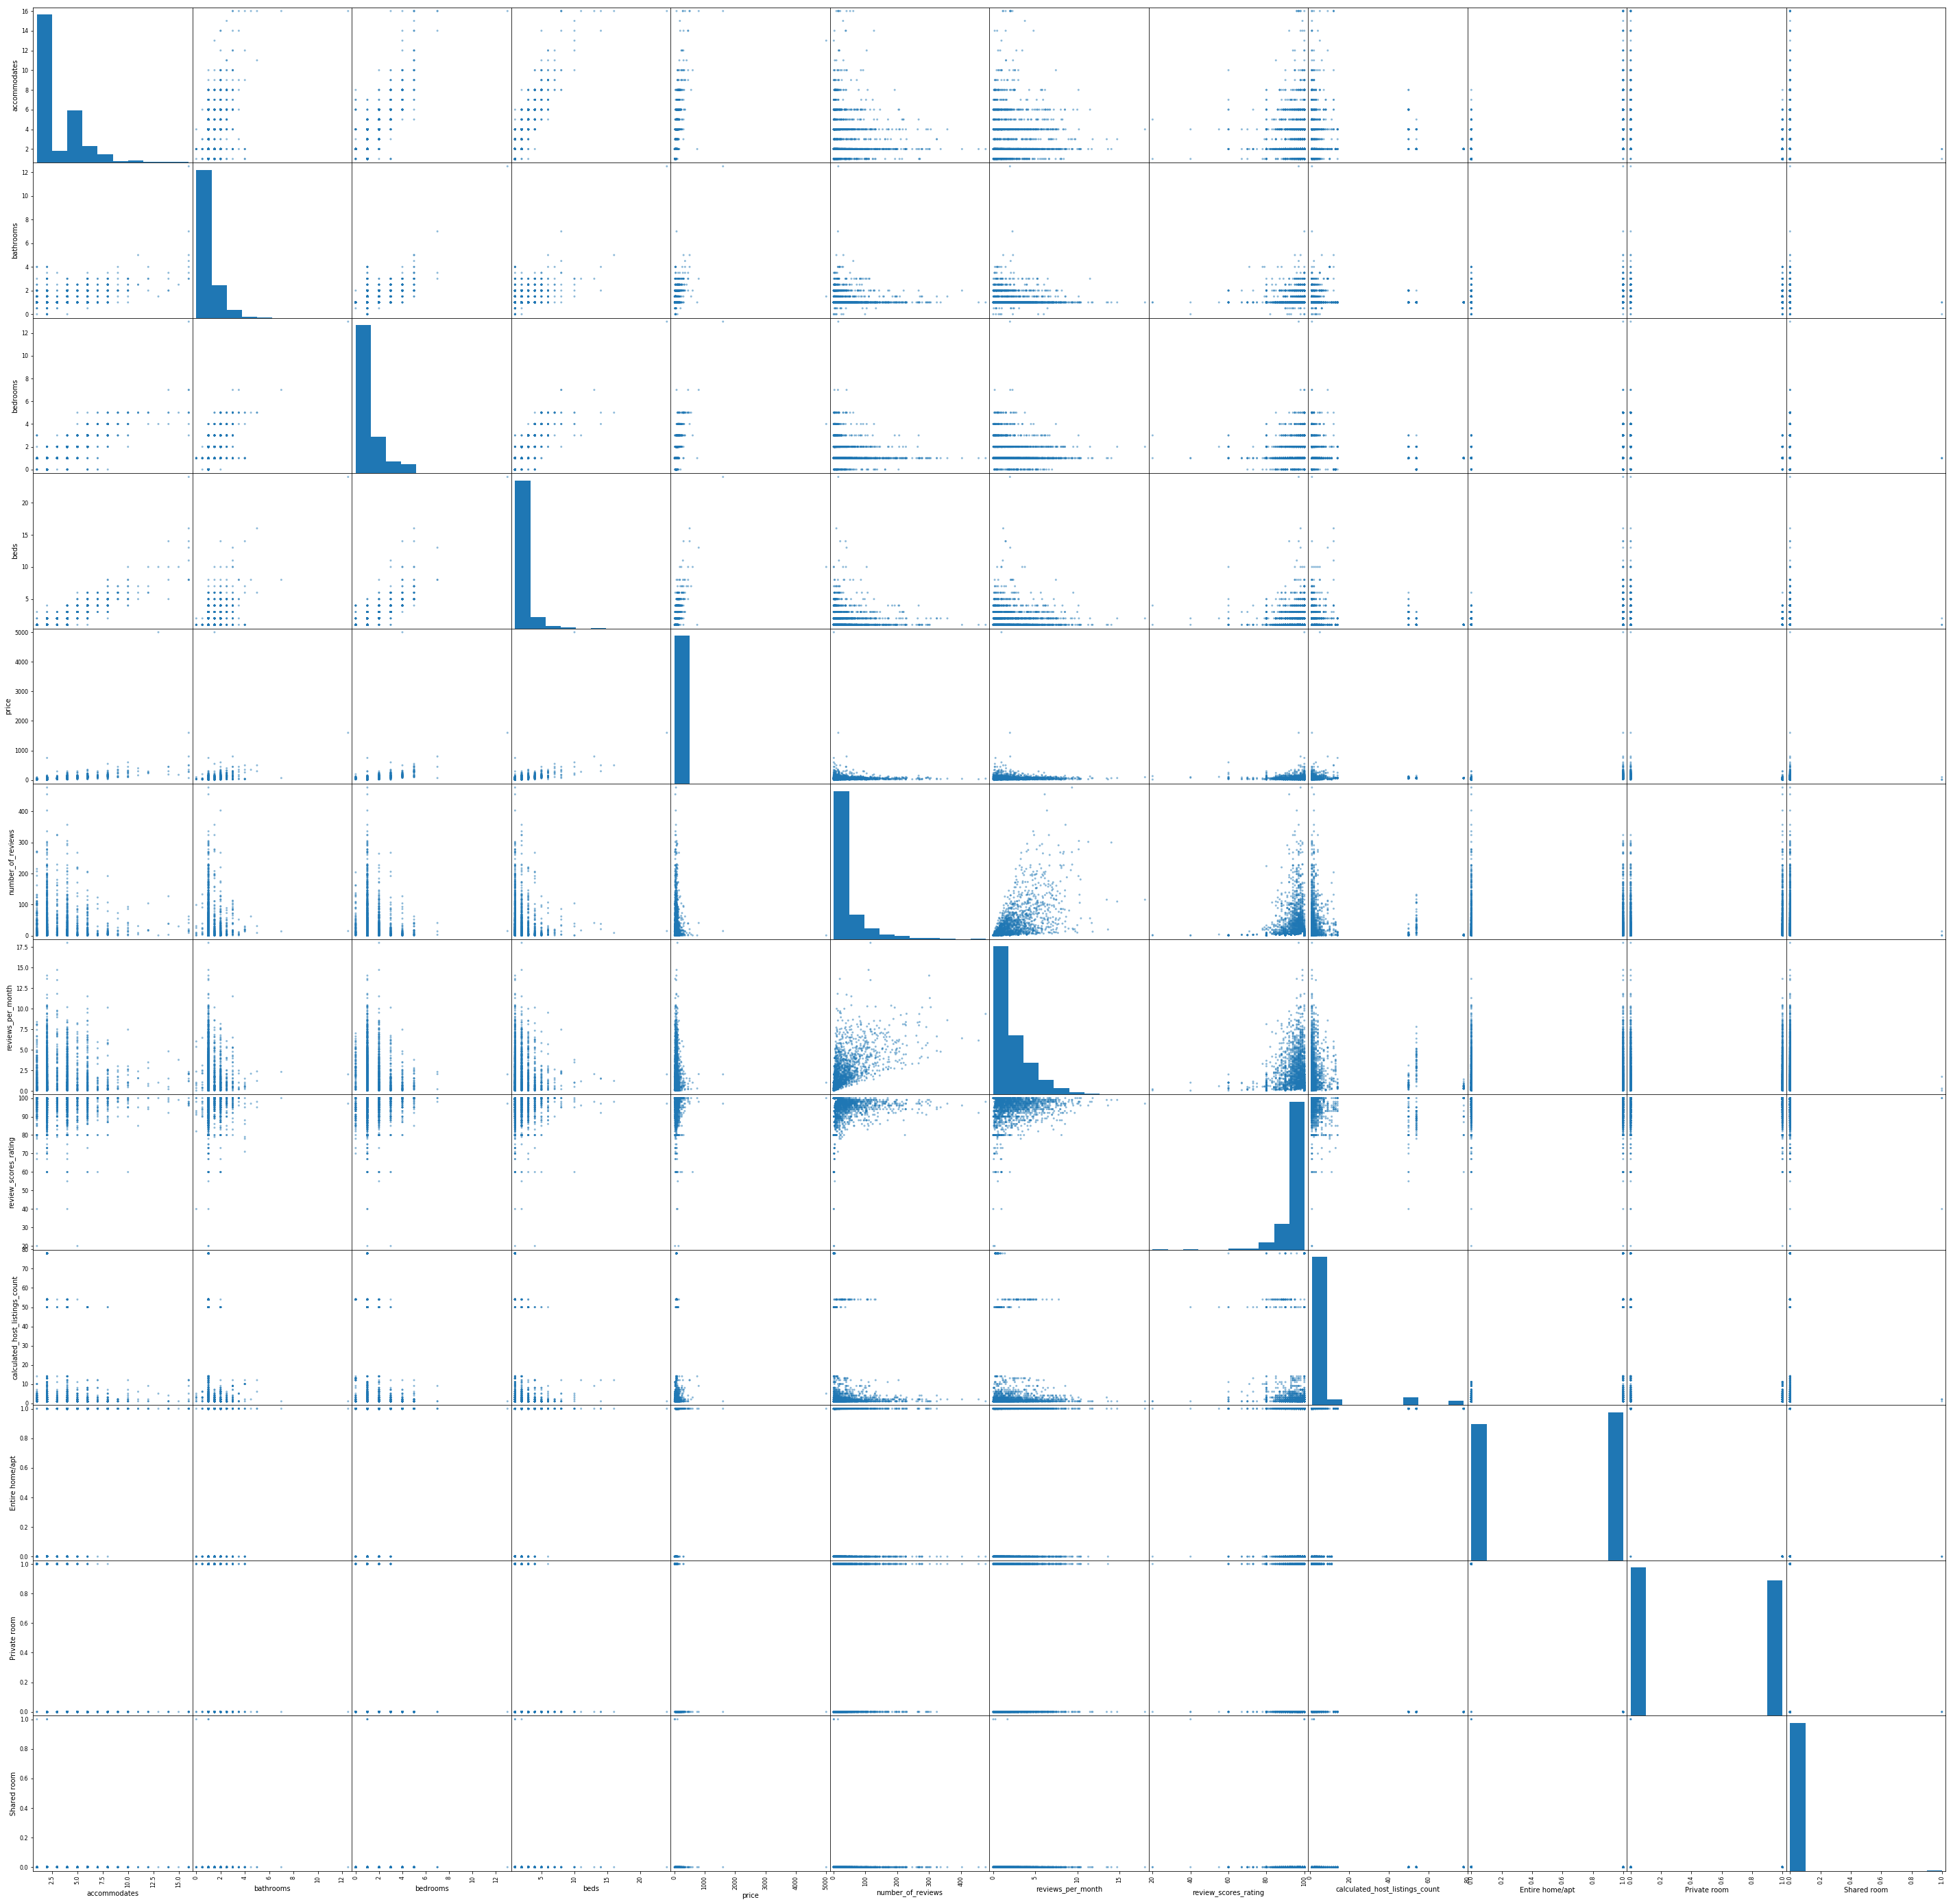

In [37]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(ab3, figsize=(50,50))
plt.show()

    The histogram and the Scatter matrix provides a scatter plot of all the coloumns in the dataset. Generally when a very large dataset is used, the scatter matrix is downloaded as an image for further analysis

Text(0.5,1,'Range of prices')

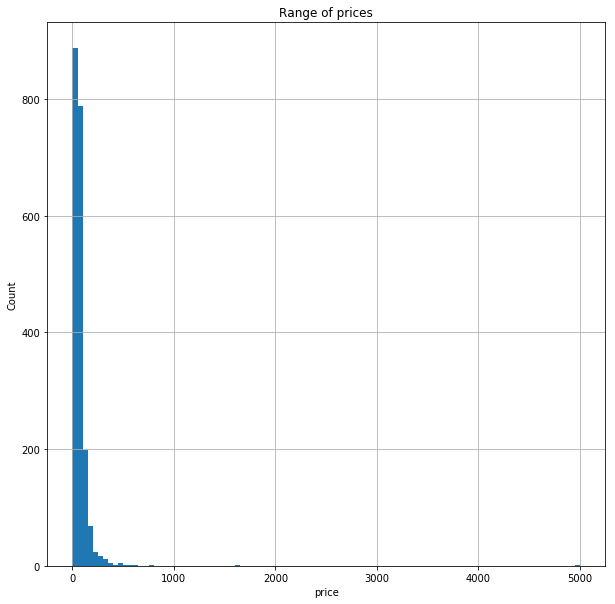

In [38]:
plt.figure(figsize=(10,10))
ab3['price'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('price')
plt.title('Range of prices')

Text(0.5,1,'price vs accommodates')

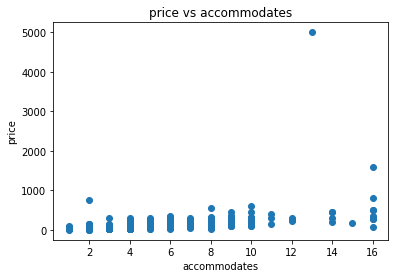

In [39]:
plt.scatter(ab3['accommodates'],ab3['price'])
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('price vs accommodates')

Text(0.5,1,'price vs bathrooms')

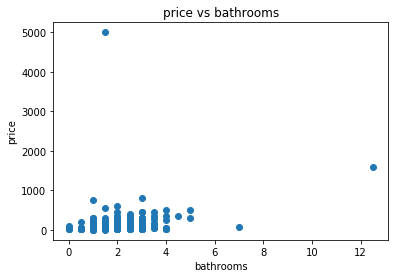

In [40]:
plt.scatter(ab3['bathrooms'],ab3['price'])
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('price vs bathrooms')

Text(0.5,1,'price vs bedrooms')

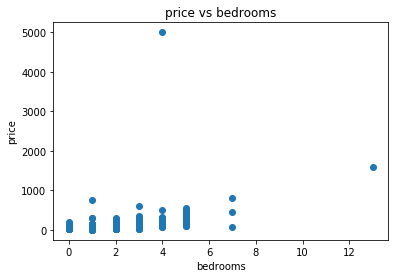

In [41]:
plt.scatter(ab3['bedrooms'],ab3['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('price vs bedrooms')

From the above three scatter plots of price against various parameters, a few outliers can be observed. As discussed earlier, since there is not way of confirming the true value as they could be unique listing put by the owners.   

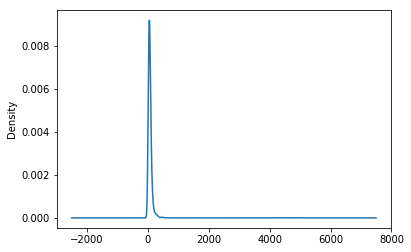

In [42]:
ab3.price.plot.density()
plt.show()

## <font color=darkblue>Applying Machine learining Models</font>
Machine Learing usually invloves either classification or predicton type problems.
Generally, the machine learing models are choosen depending on the type of problem being analysed.
Classification models for classification problems and Regression models for prediction/ regression problems.
Multiple Regression models are applied to this analysis as it is a price prediction problem for the purpose of comparing the results from various models. 

### Splitting the data into training and test data
When implementing machine learing models, it is common to split the x and y data into `x test and training data`, and `y test and training data`. This is done in order to make sure there is some sample data for the model to baseline the prediction and avoid overfitting or underfitting. The following step implements the test and train splitting of data:

#### Step-1
As the prediction is being done the be price, the price column is dropped from the dataset 
and the rest of the columns are initialized to the __X__ input.


In [43]:
X= ab3.drop(['price'],axis=1)
X

accommodates            bathrooms             bedrooms  beds  \
0                2                 1.00                 1.00     1   
1                4                 2.00                 1.00     2   
2                3                 1.00                 1.00     2   
3                2                 1.00                 1.00     1   
4                2                 1.00                 1.00     1   
5                2                 1.00                 1.00     1   
6                3                 1.00                 1.00     2   
7               14                 3.00                 5.00    10   
8                2                 1.00                 1.00     1   
9                1                 1.00                 1.00     1   
10               1                 1.00                 1.00     1   
11               1                 1.00                 1.00     1   
12               1                 1.00                 1.00     1   
13               1                 1.00                 1.00     1   
14               5                 1.00                 1.00     3   
15               2                 1.00                 1.00     1   
16               5                 2.00                 3.00     4   
17               2                 1.00                 1.00     1   
18               2                 1.00                 1.00     1   
19               2                 1.00                 1.00     3   
20               2                 1.00                 1.00     1   
21               2                 1.00                 1.00     1   
22               2                 1.00                 1.00     1   
23               4                 1.00                 1.00     1   
24               2                 1.00                 1.00     2   
25               4                 1.00                 2.00     3   
26               2                 1.50                 1.00     1   
27               2                 1.00                 1.00     1   
28               2                 1.00                 1.00     1   
29               2                 1.00                 1.00     1   
30               1                 1.00                 1.00     1   
31               5                 2.00                 2.00     4   
32               2                 2.50                 1.00     1   
33               2                 1.00                 1.00     1   
34               2                 1.00                 1.00     1   
35               1                 1.50                 1.00     1   
36               2                 1.50                 1.00     1   
37               3                 1.50                 1.00     2   
38               2                 1.50                 1.00     1   
39               2                 1.00                 1.00     2   
40               8                 2.50                 4.00     5   
41               2                 1.00                 1.00     1   
42               2                 1.00                 1.00     1   
43               2                 1.00                 1.00     1   
44               3                 1.00                 1.00     1   
45               9                 4.00                 5.00     6   
46               5                 1.00                 1.00     3   
47               1                 1.00                 1.00     1   
48               2                 1.00                 1.00     1   
49               2                 1.00                 1.00     1   
50               2                 2.00                 1.00     1   
51               1                 1.00                 1.00     1   
52               2                 1.00                 1.00     1   
53               2                 1.00                 1.00     1   
54               1                 1.00                 1.00     1   
55               2                 1.50                 1.00     1   
56              

#### Step-2
the price column is taken as the __Y__ input

In [44]:
Y=ab3.price
Y


0         27
1         65
2         38
3         35
4         59
5         35
6         65
7        450
8         50
9         27
10        32
11        25
12        17
13        16
14        98
15        28
16       150
17        45
18        90
19        24
20        30
21        28
22        50
23        95
24        35
25        68
26        26
27        55
28        55
29        21
30        27
31       120
32        28
33        55
34        48
35        33
36        28
37        32
38        29
39        37
40       150
41        33
42        28
43       105
44        35
45       350
46        76
47        17
48        55
49        40
50        44
51        27
52        27
53        85
54        22
55        35
56        35
57        70
58        31
59        26
60        26
61        75
62        30
63        54
64        37
65       120
66       155
67        25
68        32
69        28
70       140
71        40
72        24
73        45
74        25
75        20
76       100

#### Step-3
Finally, after the __X__ and __Y__ values are initialized, the necessary libraries are imported and the standard split function is applied.<br>
The test size is taken at a __0.25__ split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

### Applying Logistic Regression
As discussed earlier, Machine Learning is more of a trial and error concept so the first model applied is the Logistic regression. “Logistic regression is named for the function used at the core of the method, the logistic function.
The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment." (Brownlee. J, 2016) <br>
Logistic regression is applied in the following steps:

In [46]:
###### Logistic Regression ########

#### Step-1 
Importing logistic regression model and fitting it with the **X** and **Y** training data.

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)


#### Step-2
Predicting the __Y__ values based on the **X** test set and initializing it into a variable.

In [48]:
Y_predL=clf.predict(X_test)

Predicting the first row of the data set to see what price value the model predicts.

In [49]:
Log_pred=clf.predict([[2,1,1,1,130,2.10,96,5,0,1,0]])
Log_pred

array([25], dtype=int64)

#### Step-4 <br>
As a means of measuring the results of the prediction, the ***r2_score*** for accuracy and ***Mean Square root error*** are applied. For the ***r2_score***, the higher the value, the better. On the other hand, for the ***Mean Square root error*** values, the smaller, the better.


###### Checking r2_score

In [50]:
from  sklearn.metrics  import r2_score 
print("The Accuracy of Logistic Regression Model is:", r2_score(Y_test,Y_predL)*100, "%")

The Accuracy of Logistic Regression Model is: 48.12753929546806 %


#### Checking RMSE score

In [51]:
from sklearn.metrics import mean_squared_error
log_mse = mean_squared_error(Y_test, Y_predL)
log_rmse = np.sqrt(log_mse)
print(log_rmse)

51.43638584955608


Both the result of of `48.12753929546806 %` and `51.43638584955608` for **r2_score** and **RMSE** values are considered very bad results. <br>

     This low score results can be attributed mainly to the low correlation of price with the rest of the columns.

### Applying Linear Regression 
Next, to the same training and test data, Linear Regression is applied. 
"Linear regression is a statistical modelling technique used to describe a continuous response variable as a function of one or more predictor variables. It can help you understand and predict the behaviour of complex systems or analyse experimental, financial, and biological data.” (MathWorks, 2018) 

In [52]:
###### Linear Regression ########

In [53]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
Y_pred1=model.predict(X_test)

In [55]:
Lin_pred=model.predict([[2,1,1,1,130,2.10,96,5,0,1,0]])
Lin_pred

array([29.88601477])

##### Checking r2_score

In [56]:
from  sklearn.metrics  import r2_score 
print("The Accuracy of Linear Regression Model is:", r2_score(Y_test,Y_pred1)*100, "%")

The Accuracy of Linear Regression Model is: 58.64101193873885 %


##### Checking the RMSE score

In [57]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_test, Y_pred1)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

45.92899817190347


Once again when the **r2_scrore** and the **Root Mean Square Error** score were calculated for the linear regression,
a value of `58.64101193873885 %` and `45.92899817190347` was scored repectively.
Although it is a better value compared to the scores calculated using logistic regression, it can still be seen as low results.

### Applying Random Forest Regressor
Finally in the analysis of the data,  we employ Random Forest Regressor is used to implement the regresssion. 
"A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging" ()

In [58]:
###### Random Forest ########

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=3, n_jobs=-1)
forest.fit(X_train, Y_train)
Y_test_pred = forest.predict(X_test)

In [60]:
forest.predict([[2,1,1,1,130,2.10,96,5,0,1,0]])

array([29.262])

##### Checking r2_score

In [61]:
from  sklearn.metrics  import r2_score 
print("The Accuracy of Random Forest Regressor is:", r2_score(Y_test,Y_test_pred)*100, "%")

The Accuracy of Random Forest Regressor is: 15.521902983395908 %


##### Checking RMSE score

In [62]:
for_mse = mean_squared_error(Y_test, Y_test_pred)
for_rmse = np.sqrt(for_mse)
for_rmse

65.6408326549227

Finally, a score of `15.521902983395908 %` and `65.6408326549227` is achieved for the **r2_score** and the **RMSE** score respectively.

## <font color=darkblue>Comparison of the models and Results</font>
Finally once all the different models have been applied the next important task is to compare the results from the different machine learning models. In maching leaning, there is no assured way of determining which models give the best results. The best approach is to try out many models and select the one that gives the best result amoungst the models based on the measurement metric chosen and a strong correlation.

### comparing the RMSE values
When comparing the RMSE scores, it can be observed that the ***Linear Regression*** resulted in the lowest RMSE score. As the main intention is to reduced the RMSE values, linear regression seem to provied the least error score. The worst being the Random Forest Regressor.

In [63]:
print("Logistic:",log_rmse)
print("Linear:",lin_rmse)
print("Forest:",for_rmse)

Logistic: 51.43638584955608
Linear: 45.92899817190347
Forest: 65.6408326549227


### comparing the r2_score values
Similarly, when comparing the results of the **r2_score** for different models, the higest accuracy score achieved by the model was at `58 %`, making Linear Regression the best model applicalble for this task. 

In [64]:
print("The Accuracy of Logistic Regression Model is:", r2_score(Y_test,Y_predL)*100, "%")
print("The Accuracy of Linear Regression Model is:", r2_score(Y_test,Y_pred1)*100, "%")
print("The Accuracy of Random Forest Regressor is:", r2_score(Y_test,Y_test_pred)*100, "%")

The Accuracy of Logistic Regression Model is: 48.12753929546806 %
The Accuracy of Linear Regression Model is: 58.64101193873885 %
The Accuracy of Random Forest Regressor is: 15.521902983395908 %


## <font color=darkblue>Conclusion</font>
Based on the application of different regression models and the comparison of result, tt can also be concluded that **Linear Regression** was seems to provide the most accurate regression prediction for the analysis in comparison to the other models. The model though provided an inaccurate value score, this can be mainly due to the contribution of the low correlation values of the prices against the other columns. Hence based on this analysis, we many use the linear regression model, so- evolved to predict the pricing patterns on Airbnb listings for bristol and also other location based on the validation the results for the data and the model applied to the other listings. 

### For the purpose of demonstration, Classification model is used
As this analysis is a prediction problem, only regrssion models can be used. The following steps show the application of classification model through ensemble method.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
voting_clf = VotingClassifier(
estimators=[('rf', rnd_clf), ('svc', svm_clf)],
voting='hard'
)
voting_clf.fit(X_train, Y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [67]:
from sklearn.metrics import accuracy_score
for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

RandomForestClassifier 0.07554671968190854
SVC 0.07952286282306163
VotingClassifier 0.0775347912524851


From the above results it can be clearly noticed that the resulting scores are arbitrarily worse compared to that of the regression models.

############################################ References  #############################################################

 1) MathWorks. “Describe mathematical relationships and make predictions from experimental data”, Linear Regression, 2018 <https://www.mathworks.com/discovery/linear-regression.html>

2) Brownlee, Jason. "Logistic Regression for Machine Learning", 2016 <https://machinelearningmastery.com/logistic-regression-for-machine-learning/>

3) Hewa, Krishni. "A Beginners Guide to Random Forest Regression", 2018 <https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb>